In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# base style
sns.set_style("whitegrid")
color = ['#21525B', '#56B6A7', '#B65665', '#7756B6', '#95B656']
sns.set_palette(color)
matplotlib.rcParams['font.family'] = "roboto"
matplotlib.rcParams['font.weight'] = "light"
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['text.color'] = '#0c1b18'
matplotlib.rcParams['ytick.color'] = '#0c1b18'
matplotlib.rcParams['xtick.color'] = '#0c1b18'
matplotlib.rcParams['lines.linewidth'] = 2.5

In [2]:
with open('./data/deter-acc.svg') as f:
    svg_deter = f.read()
    
soup = BeautifulSoup(svg_deter, 'html.parser')

In [3]:
txtdata = [d.text for d in soup.find_all('title')]

In [4]:
txtdata

['Ago - 2015/2016\nÁrea Agregada 592 km²',
 'Set - 2015/2016\nÁrea Agregada 497,3 km²',
 'Out - 2015/2016\nÁrea Agregada 536,3 km²',
 'Nov - 2015/2016\nÁrea Agregada 302,8 km²',
 'Dez - 2015/2016\nÁrea Agregada 266,4 km²',
 'Jan - 2015/2016\nÁrea Agregada 229,2 km²',
 'Fev - 2015/2016\nÁrea Agregada 114,9 km²',
 'Mar - 2015/2016\nÁrea Agregada 300,1 km²',
 'Abr - 2015/2016\nÁrea Agregada 440,1 km²',
 'Mai - 2015/2016\nÁrea Agregada 408,1 km²',
 'Jun - 2015/2016\nÁrea Agregada 951,5 km²',
 'Jul - 2015/2016\nÁrea Agregada 739,2 km²',
 'Ago - 2016/2017\nÁrea Agregada 1.025 km²',
 'Set - 2016/2017\nÁrea Agregada 691,2 km²',
 'Out - 2016/2017\nÁrea Agregada 749,8 km²',
 'Nov - 2016/2017\nÁrea Agregada 366,9 km²',
 'Dez - 2016/2017\nÁrea Agregada 16,6 km²',
 'Jan - 2016/2017\nÁrea Agregada 58 km²',
 'Fev - 2016/2017\nÁrea Agregada 101,2 km²',
 'Mar - 2016/2017\nÁrea Agregada 74,3 km²',
 'Abr - 2016/2017\nÁrea Agregada 126,9 km²',
 'Mai - 2016/2017\nÁrea Agregada 363,3 km²',
 'Jun - 2016/2017

In [5]:
ptn = '(\w{3}) - (20\d\d\/20\d\d)\nÁrea Agregada (\d?\.?\d+,?\d?) km²'
rgx = re.compile(ptn)
data = [rgx.match(txt).groups() for txt in txtdata[:-1]]

In [6]:
month = {'Ago': 1, 'Set': 2, 'Out': 3, 'Nov': 4, 'Dez': 5, 'Jan': 6, 'Fev': 7, 'Mar': 8, 'Abr': 9, 'Mai': 10, 'Jun': 11, 'Jul': 12}
data = [(month.get(m, m), y, float(v.replace('.', '').replace(',', '.'))) for m, y, v in data]

In [7]:
df = pd.DataFrame(data, columns=['month', 'period', 'val'])

In [8]:
df.period = df.period.astype('category')

(-95.31000000000003, 2500)

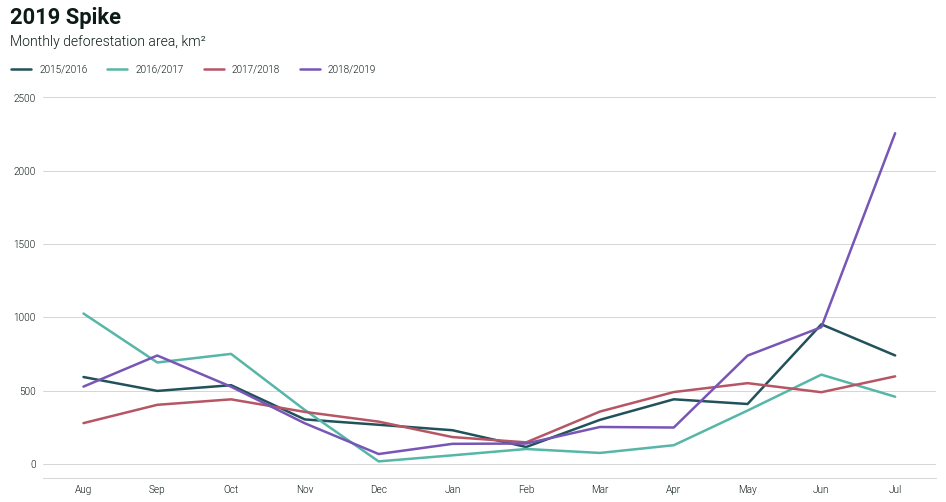

In [10]:
fig, ax = plt.subplots(figsize=(16, 7))

xticks = ['Aug', 'Sep','Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

plt.text(x=0, y=3000, s="2019 Spike",  fontsize=22, weight='bold')
plt.text(x=0, y=2850, s="Monthly deforestation area, km²",  fontsize=14)

sns.lineplot(x='month', y='val', hue='period', data=df)
sns.despine(left=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], loc=(-0.04, 1.05), labels=labels[1:], ncol=5, frameon=False, title=None)

ax.xaxis.grid(False)
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(1,13), xticks)
plt.ylim(top=2500)